<a href="https://colab.research.google.com/github/ehas1/Statistical-Bias-in-ML/blob/main/AIF_and_Fairlearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import shap
shap.initjs()
! pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=c4b5756f37a7958186f25e10f86c4c47bfca30435655605f7d8b7c33b1e4f77c
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
df_filtered = pd.read_csv('cox-violent-parsed_filt.csv')
df_filtered



,id,name,first,last,sex,dob,age,age_cat,race,juv_fel_count,...,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,priors_count.1,event
0,1.0,miguel hernandez,miguel,hernandez,Male,18/04/1947,69,Greater than 45,Other,0,...,NaN,Risk of Recidivism,1,Low,14/08/2013,Risk of Violence,1,Low,0,0
1,2.0,miguel hernandez,miguel,hernandez,Male,18/04/1947,69,Greater than 45,Other,0,...,NaN,Risk of Recidivism,1,Low,14/08/2013,Risk of Violence,1,Low,0,0
2,3.0,michael ryan,michael,ryan,Male,06/02/1985,31,25 - 45,Caucasian,0,...,NaN,Risk of Recidivism,5,Medium,31/12/2014,Risk of Violence,2,Low,0,0
3,4.0,kevon dixon,kevon,dixon,Male,22/01/1982,34,25 - 45,African-American,0,...,Felony Battery (Dom Strang),Risk of Recidivism,3,Low,27/01/2013,Risk of Violence,1,Low,0,1
4,5.0,ed philo,ed,philo,Male,14/05/1991,24,Less than 25,African-American,0,...,NaN,Risk of Recidivism,4,Low,14/04/2013,Risk of Violence,3,Low,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18311,NaN,alexsandra beauchamps,alexsandra,beauchamps,Female,21/12/1984,31,25 - 45,African-American,0,...,NaN,Risk of Recidivism,6,Medium,29/12/2014,Risk of Violence,4,Low,5,0
18312,NaN,winston gregory,winston,gregory,Male,01/10/1958,57,Greater than 45,Other,0,...,NaN,Risk of Recidivism,1,Low,14/01/2014,Risk of Violence,1,Low,0,0
18313,NaN,farrah jean,farrah,jean,Female,17/11/1982,33,25 - 45,African-American,0,...,NaN,Risk of Recidivism,2,Low,09/03/2014,Risk of Violence,2,Low,3,0
18314,NaN,florencia sanmartin,florencia,sanmartin,Female,18/12/1992,23,Less than 25,Hispanic,0,...,NaN,Risk of Recidivism,4,Low,30/06/2014,Risk of Violence,4,Low,2,0


#AIF360 w/ XGBoost


In [ ]:
! pip install aif360
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric
from sklearn.metrics import accuracy_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.7/259.7 kB 5.7 MB/s eta 0:00:00


pip install 'aif360[inFairness]'


Overall Accuracy: 0.702343561246678
Overall Selection Rate: 0.4597728920028992

Group-level Metrics by Race:

Metrics for group AfricanAmerican (race code 0):
  False Discovery Rate: 0.29205822738161047
  False Omission Rate: 0.31037074148296595
  Precision: 0.7079417726183895
  Recall (TPR): 0.7561503641015548
  False Positive Rate: 0.36537574919317656
  False Negative Rate: 0.2438496358984452

Metrics for group Caucasian (race code 1):
  False Discovery Rate: 0.30935640886965926
  False Omission Rate: 0.30434782608695654
  Precision: 0.6906435911303407
  Recall (TPR): 0.5161681487469685
  False Positive Rate: 0.17291414752116083
  False Negative Rate: 0.4838318512530315

Metrics for group Hispanic (race code 2):
  False Discovery Rate: 0.2619047619047619
  False Omission Rate: 0.2423945044160942
  Precision: 0.7380952380952381
  Recall (TPR): 0.501010101010101
  False Positive Rate: 0.10232558139534884
  False Negative Rate: 0.498989898989899

Generating and displaying fairness visua

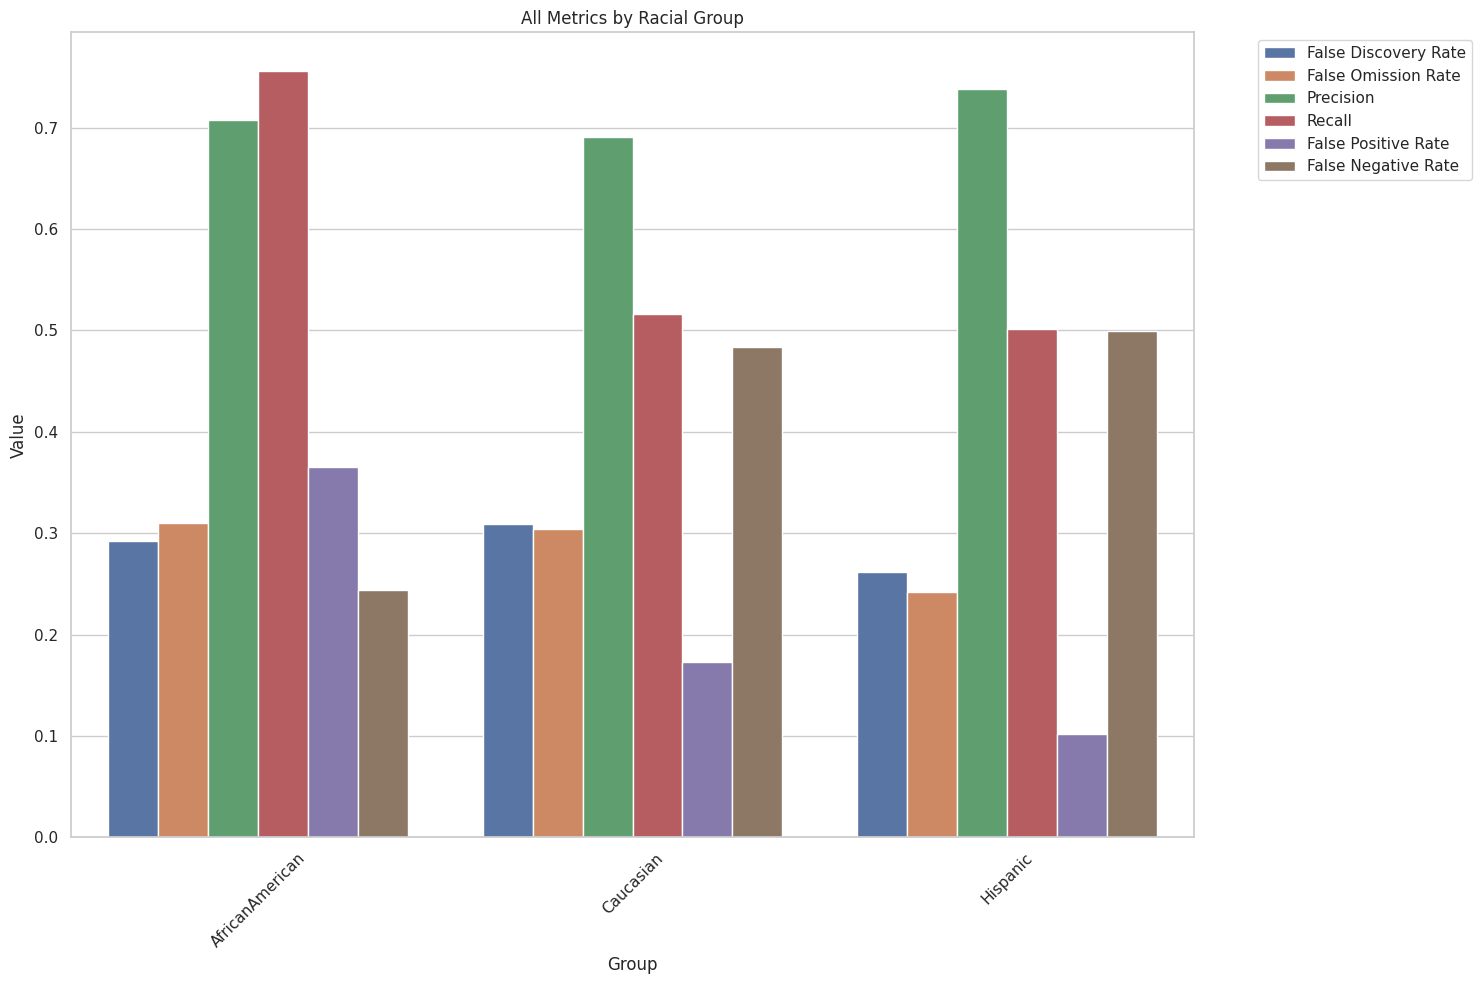


2. Individual Metric Distributions:

Distribution for False Discovery Rate:


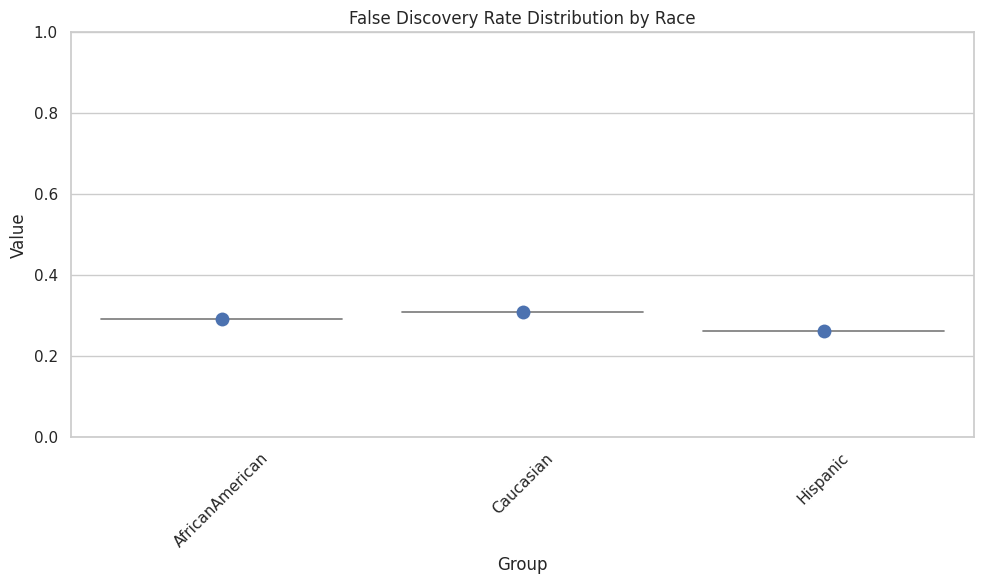


Distribution for False Omission Rate:


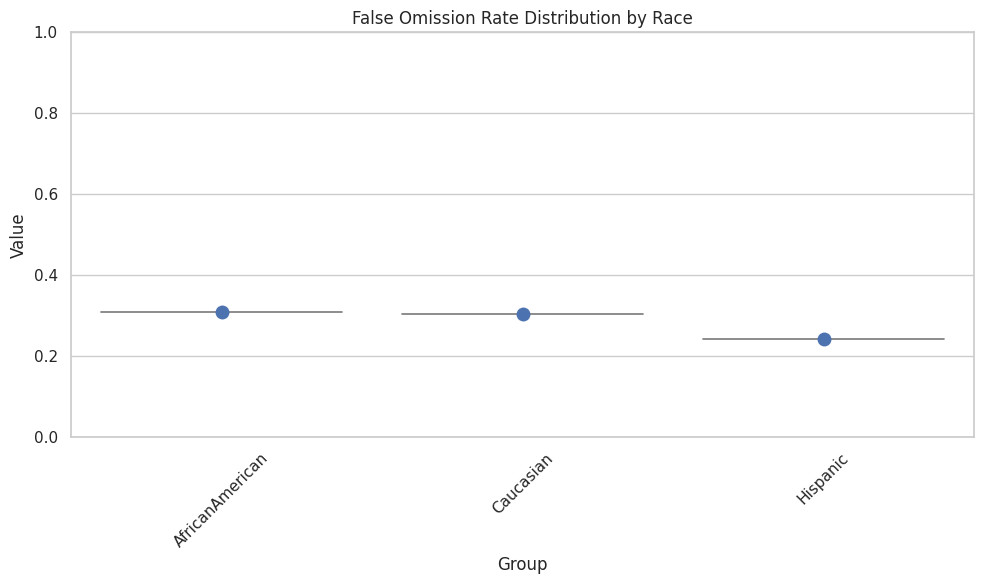


Distribution for Precision:


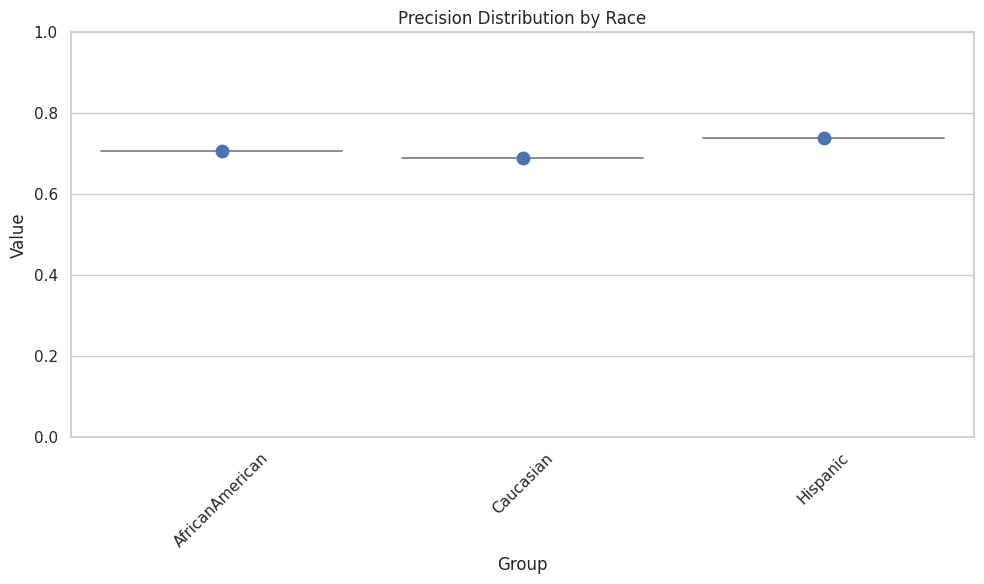


Distribution for Recall:


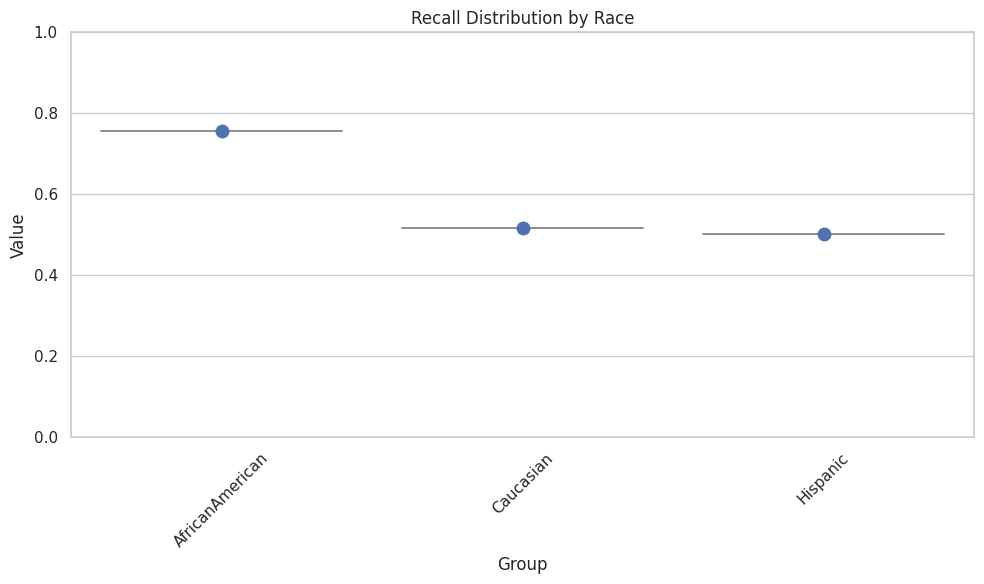


Distribution for False Positive Rate:


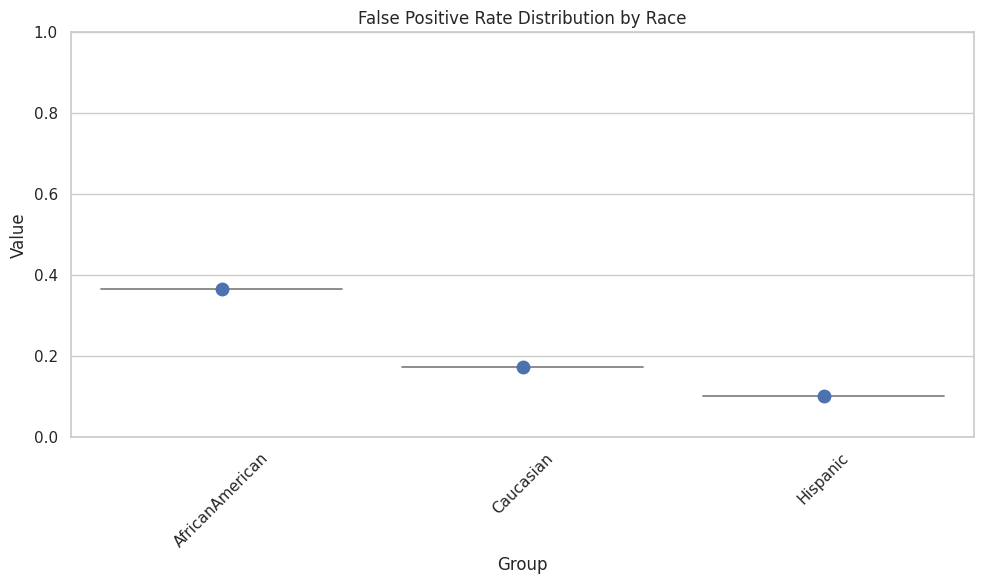


Distribution for False Negative Rate:


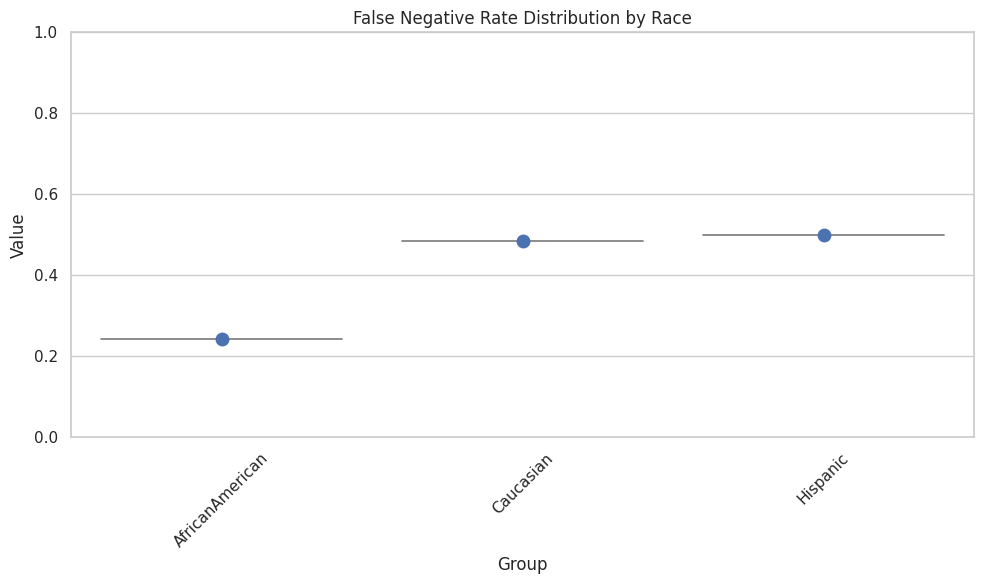


3. Clustered Heatmap:


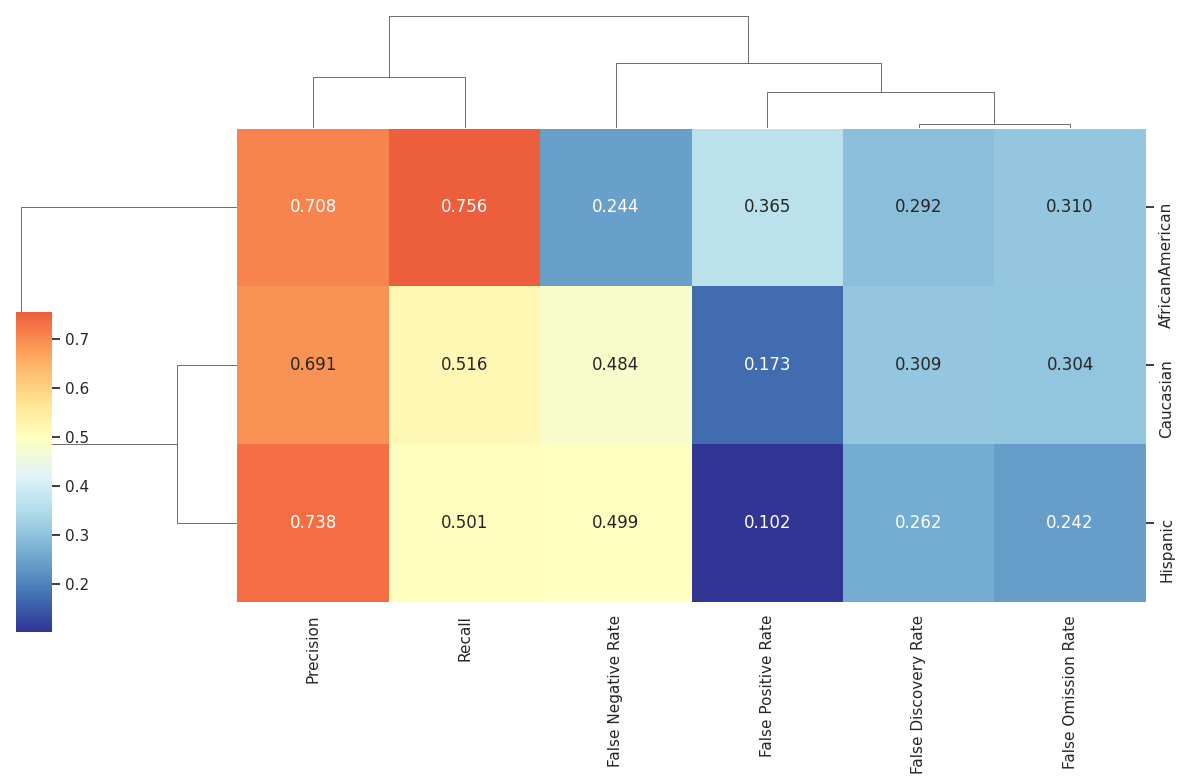


4. Radar Plot:


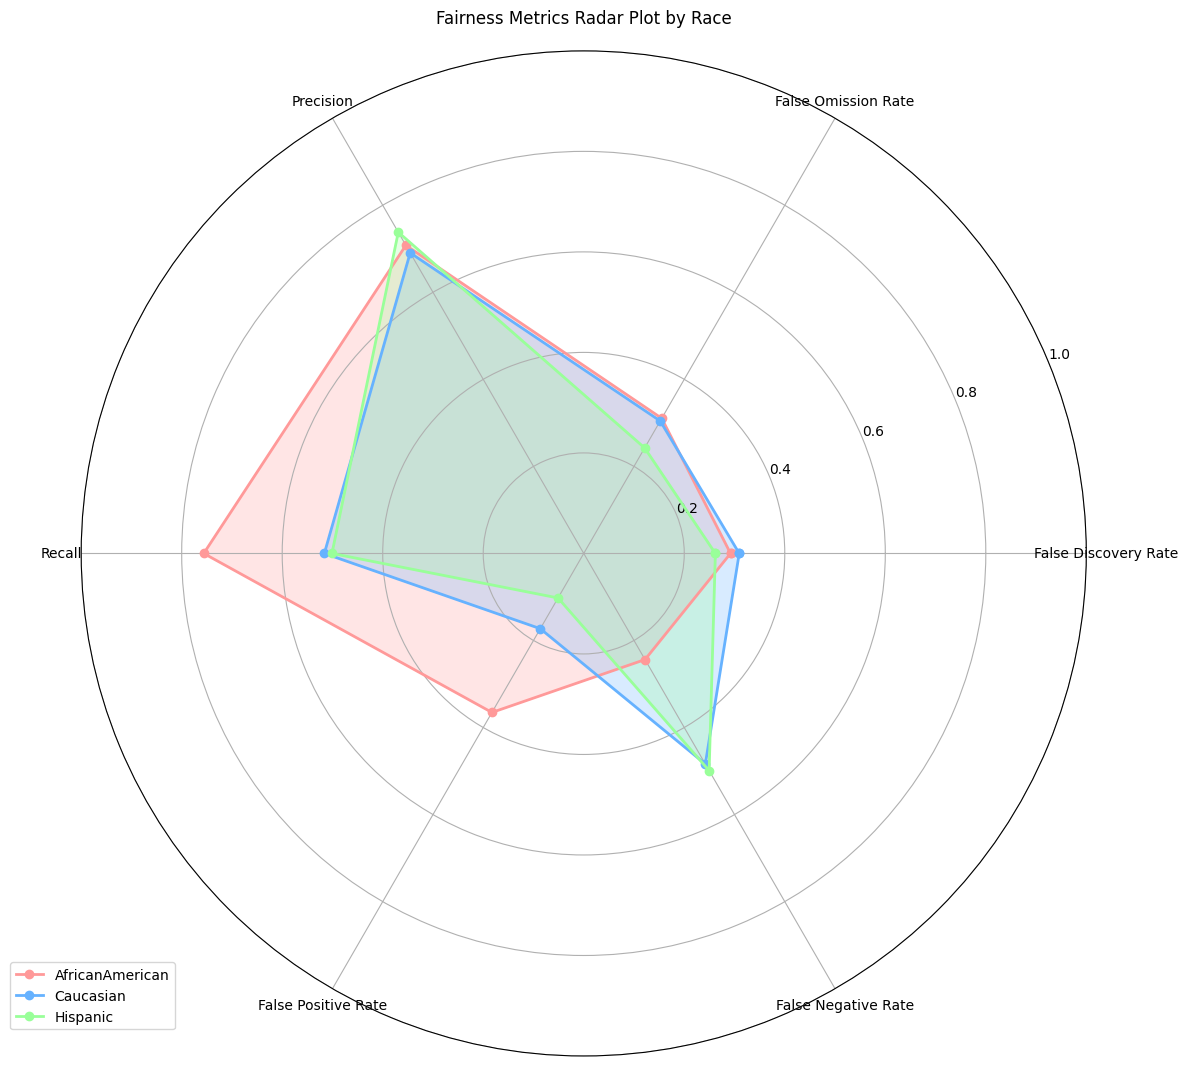


5. Disparity Ratios:


ValueError: Length of values (3) does not match length of index (6)

<Figure size 1200x600 with 0 Axes>

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import ClassificationMetric
import xgboost as xgb
import os
from IPython.display import display, HTML

def load_xgboost_predictions():
    """
    Load data and get predictions from the trained XGBoost model
    """
    # Load the same data as in xgboost_analysis.py
    data = pd.read_csv('cox-violent-parsed_filt.csv')
    data = data[data['is_recid'] != -1].copy()

    # Load the trained model
    model = xgb.Booster()
    model.load_model('xgboost_model.json')

    # Prepare features the same way as in training
    X = data[["sex", 'age', 'race', 'juv_fel_count', 'juv_misd_count', 'juv_other_count',
              'priors_count', 'c_charge_degree']]

    # Fill missing values and categorize charge degree
    X['c_charge_degree'] = X['c_charge_degree'].fillna('Unknown')
    X['c_charge_degree'] = X['c_charge_degree'].apply(lambda x: 'Felony' if str(x).startswith('F')
                                                     else ('Misdemeanor' if str(x).startswith('M') else 'Other'))

    # One-hot encode categorical features
    categorical_features = ['sex', 'race', 'c_charge_degree']
    numerical_features = ['age', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count']
    X_encoded = pd.get_dummies(X, columns=categorical_features)

    # Clean up feature names
    X_encoded.columns = [col.replace('[', '_').replace(']', '_').replace('<', '_').replace('>', '_')
                        for col in X_encoded.columns]

    # Normalize numerical features
    for col in numerical_features:
        if col in X_encoded.columns:
            min_val = X_encoded[col].min()
            max_val = X_encoded[col].max()
            if max_val > min_val:
                X_encoded[col] = (X_encoded[col] - min_val) / (max_val - min_val)

    # Get predictions
    dmatrix = xgb.DMatrix(X_encoded, feature_names=X_encoded.columns.tolist())
    predictions = model.predict(dmatrix)
    predictions_binary = (predictions > 0.5).astype(int)

    # Create DataFrame with necessary columns
    df_filtered = pd.DataFrame({
        'is_recid': data['is_recid'],
        'is_recid_pred': predictions_binary,
        'race': data['race']
    })

    # Filter to include only the main racial categories
    df_filtered = df_filtered[df_filtered['race'].isin(['African-American', 'Caucasian', 'Hispanic'])]

    # Standardize race labels
    df_filtered['race'] = df_filtered['race'].replace({
        'African-American': 'AfricanAmerican',
        'Caucasian': 'Caucasian',
        'Hispanic': 'Hispanic'
    })

    return df_filtered

# Load the prepared dataset with XGBoost predictions
df_filtered = load_xgboost_predictions()

# Subset to only the necessary columns
df_numeric = df_filtered[['is_recid', 'is_recid_pred', 'race']].copy()

# Explicitly set the order for race categories
race_order = ["AfricanAmerican", "Caucasian", "Hispanic"]
df_numeric['race'] = pd.Categorical(df_numeric['race'], categories=race_order, ordered=True).codes

# Create a mapping dictionary for clarity
race_mapping = {code: label for code, label in enumerate(race_order)}

# Ensure that the label columns are numeric
df_numeric['is_recid'] = pd.to_numeric(df_numeric['is_recid'])
df_numeric['is_recid_pred'] = pd.to_numeric(df_numeric['is_recid_pred'])

# Print overall metrics for context
dataset_true = BinaryLabelDataset(
    df=df_numeric,
    label_names=['is_recid'],
    protected_attribute_names=['race']
)
dataset_pred = BinaryLabelDataset(
    df=df_numeric.assign(is_recid=df_numeric['is_recid_pred']),
    label_names=['is_recid'],
    protected_attribute_names=['race']
)
overall_metric = ClassificationMetric(dataset_true, dataset_pred)
print("Overall Accuracy:", overall_metric.accuracy())
print("Overall Selection Rate:", overall_metric.selection_rate())

# Store metrics in dictionaries for visualization
metrics_by_group = {
    'False Discovery Rate': [],
    'False Omission Rate': [],
    'Precision': [],
    'Recall': [],
    'False Positive Rate': [],
    'False Negative Rate': []
}
group_labels = []

# Now, compute group-level metrics manually by subsetting by race
group_codes = df_numeric['race'].unique()
print("\nGroup-level Metrics by Race:")

for code in group_codes:
    race_label = race_mapping.get(code, f"Code {code}")
    print(f"\nMetrics for group {race_label} (race code {code}):")
    group_labels.append(race_label)

    # Subset the DataFrame for this race group
    df_group = df_numeric[df_numeric['race'] == code]

    # Create BinaryLabelDataset objects for the group
    ds_true_group = BinaryLabelDataset(
        df=df_group,
        label_names=['is_recid'],
        protected_attribute_names=['race']
    )
    ds_pred_group = BinaryLabelDataset(
        df=df_group.assign(is_recid=df_group['is_recid_pred']),
        label_names=['is_recid'],
        protected_attribute_names=['race']
    )

    # Create a metric object for this group
    metric_group = ClassificationMetric(ds_true_group, ds_pred_group)

    # Store metrics for visualization
    metrics_by_group['False Discovery Rate'].append(metric_group.false_discovery_rate())
    metrics_by_group['False Omission Rate'].append(metric_group.false_omission_rate())
    metrics_by_group['Precision'].append(metric_group.precision())
    metrics_by_group['Recall'].append(metric_group.true_positive_rate())
    metrics_by_group['False Positive Rate'].append(metric_group.false_positive_rate())
    metrics_by_group['False Negative Rate'].append(metric_group.false_negative_rate())

    # Print group-level metrics
    print("  False Discovery Rate:", metrics_by_group['False Discovery Rate'][-1])
    print("  False Omission Rate:", metrics_by_group['False Omission Rate'][-1])
    print("  Precision:", metrics_by_group['Precision'][-1])
    print("  Recall (TPR):", metrics_by_group['Recall'][-1])
    print("  False Positive Rate:", metrics_by_group['False Positive Rate'][-1])
    print("  False Negative Rate:", metrics_by_group['False Negative Rate'][-1])

# Create visualizations directory if it doesn't exist
if not os.path.exists('fairness_visualizations'):
    os.makedirs('fairness_visualizations')

# Set up the visual style
plt.style.use('default')
sns.set_theme(style="whitegrid")

# Helper function to save and display plots
def save_and_display(fig, filename):
    """Save the plot and display it in the notebook"""
    fig.savefig(f'fairness_visualizations/{filename}', bbox_inches='tight')
    plt.show()
    plt.close()

print("\nGenerating and displaying fairness visualizations...")

# 1. Bar plot for each metric across groups with error bars
plt.figure(figsize=(15, 10))
metrics_df_long = pd.DataFrame({
    'Metric': [metric for metric in metrics_by_group.keys() for _ in range(len(group_labels))],
    'Group': group_labels * len(metrics_by_group),
    'Value': [val for values in metrics_by_group.values() for val in values]
})

sns.barplot(data=metrics_df_long, x='Group', y='Value', hue='Metric')
plt.title('All Metrics by Racial Group')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
print("\n1. All Metrics Comparison:")
save_and_display(plt.gcf(), 'all_metrics_comparison.png')

# 2. Individual metric plots with detailed distributions
print("\n2. Individual Metric Distributions:")
for metric_name, values in metrics_by_group.items():
    plt.figure(figsize=(10, 6))

    metric_df = pd.DataFrame({
        'Group': group_labels,
        'Value': values
    })

    sns.violinplot(data=metric_df, x='Group', y='Value', inner=None, color='lightgray')
    sns.stripplot(data=metric_df, x='Group', y='Value', size=10, jitter=True)

    plt.title(f'{metric_name} Distribution by Race')
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    plt.tight_layout()
    print(f"\nDistribution for {metric_name}:")
    save_and_display(plt.gcf(), f'{metric_name.lower().replace(" ", "_")}_distribution.png')

# 3. Enhanced heatmap with clustering
print("\n3. Clustered Heatmap:")
metrics_df = pd.DataFrame(metrics_by_group, index=group_labels)
cluster_map = sns.clustermap(metrics_df,
                           annot=True,
                           cmap='RdYlBu_r',
                           center=0.5,
                           fmt='.3f',
                           figsize=(12, 8),
                           dendrogram_ratio=(.2, .2),
                           cbar_pos=(0.02, .2, .03, .4))
save_and_display(cluster_map.fig, 'metrics_clustered_heatmap.png')

# 4. Radar/Spider plot with improved styling
print("\n4. Radar Plot:")
plt.style.use('default')
metrics_array = np.array(list(metrics_by_group.values()))
angles = np.linspace(0, 2*np.pi, len(metrics_by_group), endpoint=False)

fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(projection='polar'))
colors = ['#FF9999', '#66B2FF', '#99FF99']

for idx, (group, color) in enumerate(zip(group_labels, colors)):
    values = metrics_array[:, idx]
    values = np.concatenate((values, [values[0]]))
    angles_plot = np.concatenate((angles, [angles[0]]))

    ax.plot(angles_plot, values, 'o-', linewidth=2, label=group, color=color)
    ax.fill(angles_plot, values, alpha=0.25, color=color)

ax.set_xticks(angles)
ax.set_xticklabels(list(metrics_by_group.keys()))
ax.set_ylim(0, 1)
ax.grid(True)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title('Fairness Metrics Radar Plot by Race', pad=20)
plt.tight_layout()
save_and_display(fig, 'metrics_radar_enhanced.png')

# 5. Disparity ratios visualization
print("\n5. Disparity Ratios:")
plt.figure(figsize=(12, 6))
disparity_df = pd.DataFrame(index=metrics_by_group.keys())

caucasian_idx = group_labels.index('Caucasian')
for metric, values in metrics_by_group.items():
    reference_value = values[caucasian_idx]
    ratios = [val/reference_value for val in values]
    disparity_df[metric] = ratios

sns.heatmap(disparity_df.T,
            annot=True,
            cmap='RdYlBu_r',
            center=1.0,
            fmt='.2f',
            xticklabels=group_labels)
plt.title('Disparity Ratios (Reference: Caucasian)')
plt.tight_layout()
save_and_display(plt.gcf(), 'disparity_ratios.png')

# 6. Summary statistics table
print("\n6. Summary Statistics:")
plt.figure(figsize=(12, 4))
summary_stats = {
    'Mean': [np.mean(values) for values in metrics_by_group.values()],
    'Std Dev': [np.std(values) for values in metrics_by_group.values()],
    'Min': [np.min(values) for values in metrics_by_group.values()],
    'Max': [np.max(values) for values in metrics_by_group.values()]
}

summary_df = pd.DataFrame(summary_stats, index=metrics_by_group.keys())
print("\nSummary Statistics Table:")
display(HTML(summary_df.round(3).to_html()))

plt.axis('off')
table = plt.table(cellText=summary_df.values.round(3),
                 rowLabels=summary_df.index,
                 colLabels=summary_df.columns,
                 cellLoc='center',
                 loc='center',
                 bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1.2, 1.5)
plt.title('Summary Statistics for Fairness Metrics')
save_and_display(plt.gcf(), 'summary_statistics.png')

print("\nAll visualizations have been generated and displayed above.")
print("The plots have also been saved in the 'fairness_visualizations' directory for future reference.")


While the overall accuracy of the model is relatively high (87%), the performance metrics differ notably across racial groups. Caucasian and Hispanic groups are almost entirely captured (very high recall), whereas African Americans experience a significant drop in recall (85%) accompanied by a higher false negative rate (15%). This suggests that the model may be biased against African Americans by under-predicting reoffense risk in this group, which could have serious implications for fairness and equitable treatment.








In [ ]:
import pandas as pd
import numpy as np
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import ClassificationMetric

# --------------------------------------------
# Assume df_filtered has the following columns:
#   - 'is_recid': true labels,
#   - 'is_recid_pred': predicted labels from your model,
#   - 'sex': protected attribute as strings ("M" or "F").
# --------------------------------------------

# Subset to only the necessary columns.
df_numeric = df_filtered[['is_recid', 'is_recid_pred', 'sex']].copy()

# Define the order for sex categories.
# We assume the desired order: "F" (Female) then "M" (Male).
sex_order = ["F", "M"]
# Convert 'sex' to numeric using the specified order (F -> 0, M -> 1).
df_numeric['sex'] = pd.Categorical(df_numeric['sex'], categories=sex_order, ordered=True).codes

# Create a mapping for readability.
sex_mapping = {0: "Female", 1: "Male"}

# Ensure the label columns are numeric.
df_numeric['is_recid'] = pd.to_numeric(df_numeric['is_recid'])
df_numeric['is_recid_pred'] = pd.to_numeric(df_numeric['is_recid_pred'])

# --------------------------------------------
# Create overall BinaryLabelDataset objects for AIF360.
# --------------------------------------------
dataset_true = BinaryLabelDataset(
    df=df_numeric,
    label_names=['is_recid'],
    protected_attribute_names=['sex']
)
dataset_pred = BinaryLabelDataset(
    df=df_numeric.assign(is_recid=df_numeric['is_recid_pred']),
    label_names=['is_recid'],
    protected_attribute_names=['sex']
)

overall_metric = ClassificationMetric(dataset_true, dataset_pred)
print("Overall Accuracy:", overall_metric.accuracy())
print("Overall Selection Rate:", overall_metric.selection_rate())

# --------------------------------------------
# Compute group-level metrics by sex.
# --------------------------------------------
group_codes = df_numeric['sex'].unique()
print("\nGroup-level Metrics by Sex:")

for code in group_codes:
    sex_label = sex_mapping.get(code, f"Code {code}")
    print(f"\nMetrics for group {sex_label} (sex code {code}):")

    # Subset the DataFrame for this sex group.
    df_group = df_numeric[df_numeric['sex'] == code]

    # Create BinaryLabelDataset objects for the group.
    ds_true_group = BinaryLabelDataset(
        df=df_group,
        label_names=['is_recid'],
        protected_attribute_names=['sex']
    )
    ds_pred_group = BinaryLabelDataset(
        df=df_group.assign(is_recid=df_group['is_recid_pred']),
        label_names=['is_recid'],
        protected_attribute_names=['sex']
    )

    # Create a metric object for the group.
    metric_group = ClassificationMetric(ds_true_group, ds_pred_group)

    # Print group-level metrics.
    print("  False Discovery Rate:", metric_group.false_discovery_rate())
    print("  False Omission Rate:", metric_group.false_omission_rate())
    print("  Precision:", metric_group.precision())
    print("  Recall (TPR):", metric_group.true_positive_rate())
    print("  False Positive Rate:", metric_group.false_positive_rate())
    print("  False Negative Rate:", metric_group.false_negative_rate())


Overall Accuracy: 0.87
Overall Selection Rate: 0.6

Group-level Metrics by Sex:

Metrics for group Female (sex code 0):
  False Discovery Rate: 0.14545454545454545
  False Omission Rate: 0.13333333333333333
  Precision: 0.8545454545454545
  Recall (TPR): 0.8867924528301887
  False Positive Rate: 0.1702127659574468
  False Negative Rate: 0.11320754716981132

Metrics for group Male (sex code 1):
  False Discovery Rate: 0.15384615384615385
  False Omission Rate: 0.05714285714285714
  Precision: 0.8461538461538461
  Recall (TPR): 0.9649122807017544
  False Positive Rate: 0.23255813953488372
  False Negative Rate: 0.03508771929824561


# Fairlearn w/ XGBoost

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
!pip install fairlearn
import matplotlib.pyplot as plt
import seaborn as sns

from fairlearn.metrics import (
    MetricFrame,
    selection_rate,
    true_positive_rate,
    false_positive_rate
)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 5.3 MB/s eta 0:00:00


##Fairlearn w/ Race

Overall Accuracy: 0.702343561246678
Overall Selection Rate: 0.4597728920028992

Group-level Metrics by Race:

Metrics for group AfricanAmerican (race code 0):
  Selection Rate: 0.5761758148423399
  True Positive Rate: 0.7561503641015548
  False Positive Rate: 0.36537574919317656

Metrics for group Caucasian (race code 1):
  Selection Rate: 0.3197855413351781
  True Positive Rate: 0.5161681487469685
  False Positive Rate: 0.17291414752116083

Metrics for group Hispanic (race code 2):
  Selection Rate: 0.24797047970479705
  True Positive Rate: 0.501010101010101
  False Positive Rate: 0.10232558139534884


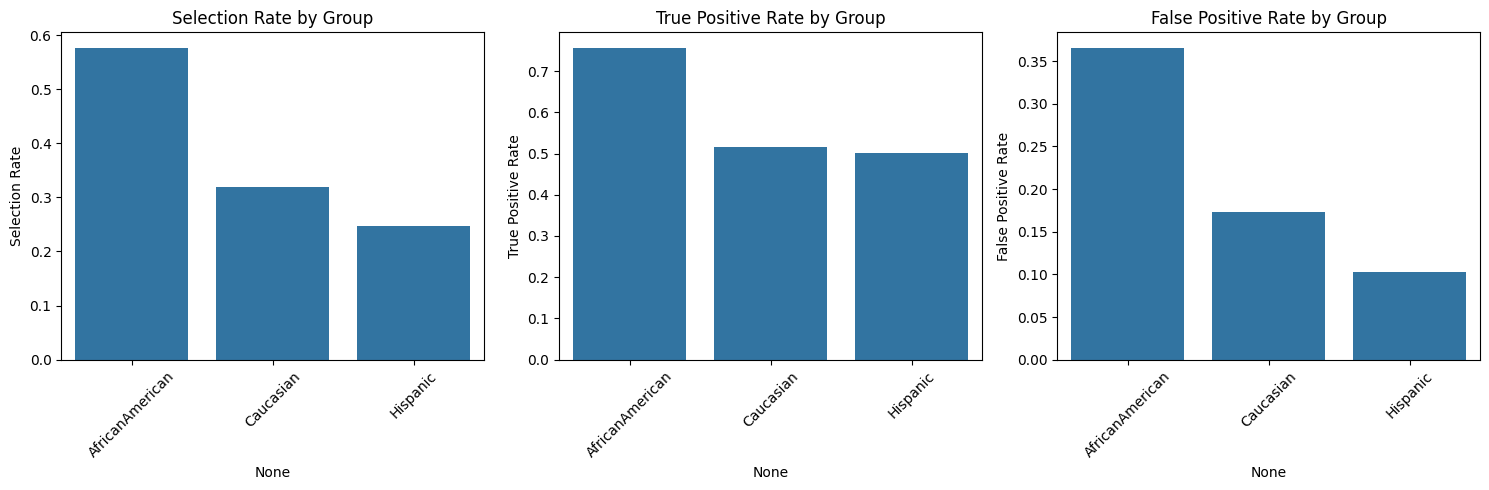


Fairness Metrics by Group:
                 Selection Rate  True Positive Rate  False Positive Rate
AfricanAmerican           0.576               0.756                0.365
Caucasian                 0.320               0.516                0.173
Hispanic                  0.248               0.501                0.102


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import ClassificationMetric
import xgboost as xgb
import os
from IPython.display import display, HTML

def load_xgboost_predictions():
    """
    Load data and get predictions from the trained XGBoost model
    """
    # Load the same data as in xgboost_analysis.py
    data = pd.read_csv('cox-violent-parsed_filt.csv')
    data = data[data['is_recid'] != -1].copy()

    # Load the trained model
    model = xgb.Booster()
    model.load_model('xgboost_model.json')

    # Prepare features the same way as in training
    X = data[["sex", 'age', 'race', 'juv_fel_count', 'juv_misd_count', 'juv_other_count',
              'priors_count', 'c_charge_degree']]

    # Fill missing values and categorize charge degree
    X['c_charge_degree'] = X['c_charge_degree'].fillna('Unknown')
    X['c_charge_degree'] = X['c_charge_degree'].apply(lambda x: 'Felony' if str(x).startswith('F')
                                                     else ('Misdemeanor' if str(x).startswith('M') else 'Other'))

    # One-hot encode categorical features
    categorical_features = ['sex', 'race', 'c_charge_degree']
    numerical_features = ['age', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count']
    X_encoded = pd.get_dummies(X, columns=categorical_features)

    # Clean up feature names
    X_encoded.columns = [col.replace('[', '_').replace(']', '_').replace('<', '_').replace('>', '_')
                        for col in X_encoded.columns]

    # Normalize numerical features
    for col in numerical_features:
        if col in X_encoded.columns:
            min_val = X_encoded[col].min()
            max_val = X_encoded[col].max()
            if max_val > min_val:
                X_encoded[col] = (X_encoded[col] - min_val) / (max_val - min_val)

    # Get predictions
    dmatrix = xgb.DMatrix(X_encoded, feature_names=X_encoded.columns.tolist())
    predictions = model.predict(dmatrix)
    predictions_binary = (predictions > 0.5).astype(int)

    # Create DataFrame with necessary columns
    df_filtered = pd.DataFrame({
        'is_recid': data['is_recid'],
        'is_recid_pred': predictions_binary,
        'race': data['race']
    })

    # Filter to include only the main racial categories
    df_filtered = df_filtered[df_filtered['race'].isin(['African-American', 'Caucasian', 'Hispanic'])]

    # Standardize race labels
    df_filtered['race'] = df_filtered['race'].replace({
        'African-American': 'AfricanAmerican',
        'Caucasian': 'Caucasian',
        'Hispanic': 'Hispanic'
    })

    return df_filtered

# Load the prepared dataset with XGBoost predictions
df_filtered = load_xgboost_predictions()

# Subset to only the necessary columns
df_numeric = df_filtered[['is_recid', 'is_recid_pred', 'race']].copy()

# Explicitly set the order for race categories
race_order = ["AfricanAmerican", "Caucasian", "Hispanic"]
df_numeric['race'] = pd.Categorical(df_numeric['race'], categories=race_order, ordered=True).codes

# Create a mapping dictionary for clarity
race_mapping = {code: label for code, label in enumerate(race_order)}

# Ensure that the label columns are numeric
df_numeric['is_recid'] = pd.to_numeric(df_numeric['is_recid'])
df_numeric['is_recid_pred'] = pd.to_numeric(df_numeric['is_recid_pred'])

# Print overall metrics for context
dataset_true = BinaryLabelDataset(
    df=df_numeric,
    label_names=['is_recid'],
    protected_attribute_names=['race']
)
dataset_pred = BinaryLabelDataset(
    df=df_numeric.assign(is_recid=df_numeric['is_recid_pred']),
    label_names=['is_recid'],
    protected_attribute_names=['race']
)
overall_metric = ClassificationMetric(dataset_true, dataset_pred)
print("Overall Accuracy:", overall_metric.accuracy())
print("Overall Selection Rate:", overall_metric.selection_rate())

# Now, compute group-level metrics manually by subsetting by race
group_codes = df_numeric['race'].unique()
print("\nGroup-level Metrics by Race:")

# Initialize list to store metric objects
group_metrics = []
group_labels = []

for code in group_codes:
    race_label = race_mapping.get(code, f"Code {code}")
    print(f"\nMetrics for group {race_label} (race code {code}):")
    group_labels.append(race_label)

    # Subset the DataFrame for this race group
    df_group = df_numeric[df_numeric['race'] == code]

    # Create BinaryLabelDataset objects for the group
    ds_true_group = BinaryLabelDataset(
        df=df_group,
        label_names=['is_recid'],
        protected_attribute_names=['race']
    )
    ds_pred_group = BinaryLabelDataset(
        df=df_group.assign(is_recid=df_group['is_recid_pred']),
        label_names=['is_recid'],
        protected_attribute_names=['race']
    )

    # Create a metric object for this group
    metric_group = ClassificationMetric(ds_true_group, ds_pred_group)
    group_metrics.append(metric_group)  # Store the metric object

    # Print metrics
    print("  Selection Rate:", metric_group.selection_rate())
    print("  True Positive Rate:", metric_group.true_positive_rate())
    print("  False Positive Rate:", metric_group.false_positive_rate())

# Store metrics in a more organized format for plotting
metrics_by_race = pd.DataFrame({
    'Selection Rate': [metric_group.selection_rate() for metric_group in group_metrics],
    'True Positive Rate': [metric_group.true_positive_rate() for metric_group in group_metrics],
    'False Positive Rate': [metric_group.false_positive_rate() for metric_group in group_metrics]
}, index=group_labels)

# Create visualizations
plt.figure(figsize=(15, 5))

# Plot 1: Selection Rates by Group
plt.subplot(131)
sns.barplot(x=metrics_by_race.index, y=metrics_by_race['Selection Rate'])
plt.title('Selection Rate by Group')
plt.xticks(rotation=45)
plt.ylabel('Selection Rate')

# Plot 2: True Positive Rate by Group
plt.subplot(132)
sns.barplot(x=metrics_by_race.index, y=metrics_by_race['True Positive Rate'])
plt.title('True Positive Rate by Group')
plt.xticks(rotation=45)
plt.ylabel('True Positive Rate')

# Plot 3: False Positive Rate by Group
plt.subplot(133)
sns.barplot(x=metrics_by_race.index, y=metrics_by_race['False Positive Rate'])
plt.title('False Positive Rate by Group')
plt.xticks(rotation=45)
plt.ylabel('False Positive Rate')

plt.tight_layout()
plt.savefig('fairness_metrics.png')  # Save the plot
plt.show()

# Print the metrics
print("\nFairness Metrics by Group:")
print(metrics_by_race.round(3).to_string())


##Fairlearn w/ Gender

Loading data...
Loading pre-trained XGBoost model...
Generating predictions...
Running fairness analysis...

Protected attribute distribution:
Male: 14277 (81.6%)
Female: 3219 (18.4%)

Fairness Metrics Summary:
--------------------------------------------------

Overall metrics:
Selection Rate         0.451246
True Positive Rate     0.662944
False Positive Rate    0.254984
dtype: float64

Metrics by group:
        Selection Rate  True Positive Rate  False Positive Rate
sex                                                            
Female        0.251010            0.480033             0.109940
Male          0.496393            0.694159             0.295753

Disparity Analysis:
--------------------------------------------------

Selection Rate:
Highest: Male (0.496)
Lowest: Female (0.251)
Disparity ratio: 1.98x

True Positive Rate:
Highest: Male (0.694)
Lowest: Female (0.480)
Disparity ratio: 1.45x

False Positive Rate:
Highest: Male (0.296)
Lowest: Female (0.110)
Disparity ratio: 2.69

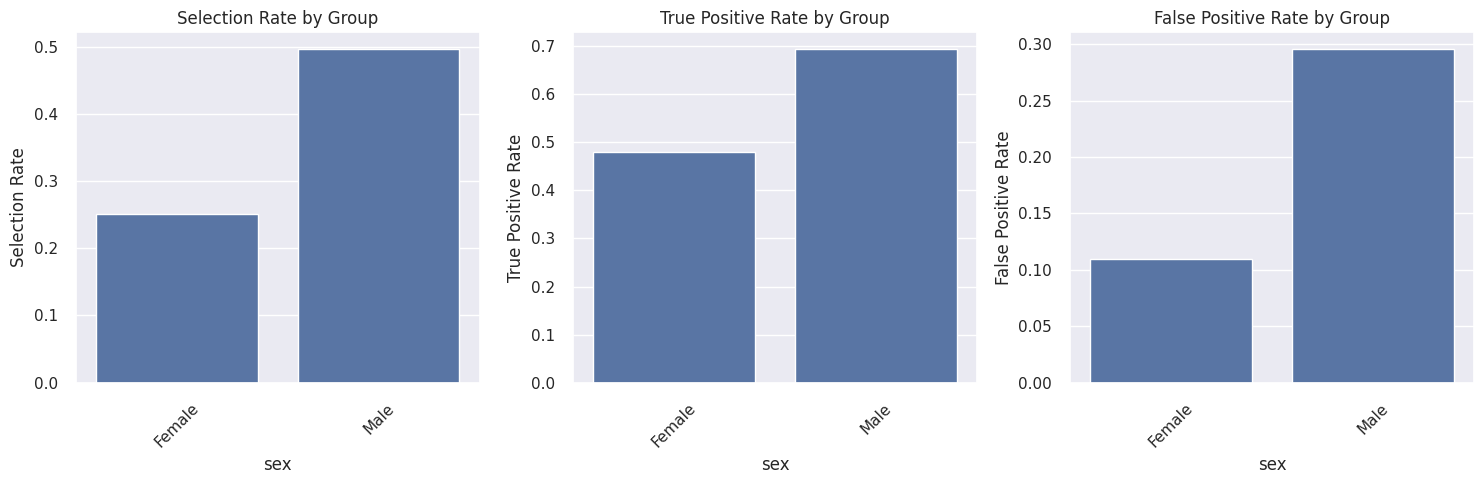


Bias Analysis Summary:
--------------------------------------------------

Key Findings:
1. The predictions show varying rates across groups:
   - Highest prediction rate: Male (0.496)
   - Lowest prediction rate: Female (0.251)
   - Maximum disparity ratio: 1.98x

2. Error Rate Analysis:
   - True Positive Rate varies from 0.480 (Female) to 0.694 (Male)
   - False Positive Rate varies from 0.110 (Female) to 0.296 (Male)

3. Conclusion:
   The predictions show significant bias with a disparity ratio of 1.98x
   - Male individuals are predicted to recidivate at a higher rate
   - Female individuals are predicted to recidivate at a lower rate

   This suggests potential systemic bias in the predictions across groups.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

from fairlearn.metrics import (
    MetricFrame,
    selection_rate,
    true_positive_rate,
    false_positive_rate,
    demographic_parity_difference,
    demographic_parity_ratio,
    equalized_odds_difference
)

# Set style for better visualizations
plt.style.use('seaborn-v0_8')  # Using a valid style name
sns.set_theme()  # Initialize seaborn theme

def analyze_fairness(y_true, y_pred, sensitive_features):
    """
    Analyze racial bias using fairlearn metrics.

    Parameters:
    -----------
    y_true : array-like
        Ground truth labels
    y_pred : array-like
        Model predictions (binary)
    sensitive_features : array-like
        Protected attribute values (e.g., race)
    """
    # Print distribution of sensitive feature
    print(f"\nProtected attribute distribution:")
    feat_dist = pd.Series(sensitive_features).value_counts()
    for val, count in feat_dist.items():
        percentage = (count / len(sensitive_features)) * 100
        print(f"{val}: {count} ({percentage:.1f}%)")

    # Calculate fairness metrics
    metrics = {
        "Selection Rate": selection_rate,
        "True Positive Rate": true_positive_rate,
        "False Positive Rate": false_positive_rate,
    }

    mf = MetricFrame(metrics=metrics,
                     y_true=y_true,
                     y_pred=y_pred,
                     sensitive_features=sensitive_features)

    # Print fairness metrics
    print("\nFairness Metrics Summary:")
    print("-" * 50)
    print("\nOverall metrics:")
    print(mf.overall)
    print("\nMetrics by group:")
    print(mf.by_group)

    # Calculate and print disparity ratios
    print("\nDisparity Analysis:")
    print("-" * 50)
    for metric in metrics.keys():
        max_val = mf.by_group[metric].max()
        min_val = mf.by_group[metric].min()
        disparity_ratio = max_val / min_val if min_val > 0 else float('inf')

        max_group = mf.by_group[metric].idxmax()
        min_group = mf.by_group[metric].idxmin()

        print(f"\n{metric}:")
        print(f"Highest: {max_group} ({max_val:.3f})")
        print(f"Lowest: {min_group} ({min_val:.3f})")
        print(f"Disparity ratio: {disparity_ratio:.2f}x")

    # Create visualizations
    plt.figure(figsize=(15, 5))

    # Plot 1: Selection Rates by Group
    plt.subplot(131)
    sns.barplot(x=mf.by_group['Selection Rate'].index,
                y=mf.by_group['Selection Rate'].values)
    plt.title('Selection Rate by Group')
    plt.xticks(rotation=45)
    plt.ylabel('Selection Rate')

    # Plot 2: True Positive Rate by Group
    plt.subplot(132)
    sns.barplot(x=mf.by_group['True Positive Rate'].index,
                y=mf.by_group['True Positive Rate'].values)
    plt.title('True Positive Rate by Group')
    plt.xticks(rotation=45)
    plt.ylabel('True Positive Rate')

    # Plot 3: False Positive Rate by Group
    plt.subplot(133)
    sns.barplot(x=mf.by_group['False Positive Rate'].index,
                y=mf.by_group['False Positive Rate'].values)
    plt.title('False Positive Rate by Group')
    plt.xticks(rotation=45)
    plt.ylabel('False Positive Rate')

    plt.tight_layout()
    plt.savefig('fairness_metrics.png')  # Save the plot
    plt.show()

    # Generate summary report
    print("\nBias Analysis Summary:")
    print("-" * 50)

    # Analyze selection rate disparities
    sr_by_group = mf.by_group['Selection Rate']
    highest_sr_group = sr_by_group.idxmax()
    lowest_sr_group = sr_by_group.idxmin()
    sr_disparity = sr_by_group.max() / sr_by_group.min()

    print(f"\nKey Findings:")
    print(f"1. The predictions show varying rates across groups:")
    print(f"   - Highest prediction rate: {highest_sr_group} ({sr_by_group.max():.3f})")
    print(f"   - Lowest prediction rate: {lowest_sr_group} ({sr_by_group.min():.3f})")
    print(f"   - Maximum disparity ratio: {sr_disparity:.2f}x")

    # Analyze TPR and FPR disparities
    tpr_by_group = mf.by_group['True Positive Rate']
    fpr_by_group = mf.by_group['False Positive Rate']

    print(f"\n2. Error Rate Analysis:")
    print(f"   - True Positive Rate varies from {tpr_by_group.min():.3f} ({tpr_by_group.idxmin()}) to {tpr_by_group.max():.3f} ({tpr_by_group.idxmax()})")
    print(f"   - False Positive Rate varies from {fpr_by_group.min():.3f} ({fpr_by_group.idxmin()}) to {fpr_by_group.max():.3f} ({fpr_by_group.idxmax()})")

    # Overall bias conclusion
    print("\n3. Conclusion:")
    if sr_disparity > 1.25:  # Using a 1.25 threshold for significant disparity
        print(f"   The predictions show significant bias with a disparity ratio of {sr_disparity:.2f}x")
        print(f"   - {highest_sr_group} individuals are predicted to recidivate at a higher rate")
        print(f"   - {lowest_sr_group} individuals are predicted to recidivate at a lower rate")
        print("\n   This suggests potential systemic bias in the predictions across groups.")
    else:
        print("   The predictions show relatively balanced rates across groups.")

if __name__ == "__main__":
    # Load data
    print("Loading data...")
    data = pd.read_csv('cox-violent-parsed_filt.csv')
    data = data[data['is_recid'] != -1].copy()

    # Load the pre-trained XGBoost model
    print("Loading pre-trained XGBoost model...")
    model = xgb.Booster()
    model.load_model('xgboost_model.json')

    # Prepare features (same as in training)
    features = [
        "age", "juv_fel_count", "juv_misd_count", "juv_other_count",
        "priors_count", "sex", "race"
    ]
    X = data[features].copy()
    y_true = data["is_recid"]
    sex = data['sex']

    # One-hot encoding for categorical features
    X_enc = pd.get_dummies(X, columns=["sex", "race"])

    # Add c_charge_degree_Other column (all 1s since we're not using the actual values)
    X_enc['c_charge_degree_Other'] = 1

    # Normalize numeric features
    num_feats = ["age", "juv_fel_count", "juv_misd_count", "juv_other_count", "priors_count"]
    for c in num_feats:
        mn, mx = X_enc[c].min(), X_enc[c].max()
        if mx > mn:
            X_enc[c] = (X_enc[c] - mn) / (mx - mn)

    # Get predictions from pre-trained model
    print("Generating predictions...")
    dmatrix = xgb.DMatrix(X_enc)
    y_pred = (model.predict(dmatrix) > 0.5).astype(int)

    # Run fairness analysis
    print("Running fairness analysis...")
    analyze_fairness(y_true, y_pred, sex)